Notes:
1. Micrograd is to perform backpropagation (applying chain rule to calculate gradients of loss function wrt weights) --> Use gradients to adjust weights and train again --> arrive at optimal weights for objective

2. Scalar valued gradient calculation..so not tensors

3. Micrograd isnt complex bro. only 2 file.

4. Derivatives - 101 - what is the expressionof a derivative? f(x+h) - f(x) / h where lim h->0 ==> explanation of what is differentiable nto a derivative --> sensitivity of the function when the input is bumped up or down

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*(x**2) - (4*x) + 5

In [3]:
f(20)

1125

In [4]:
h = 0.000001
x=-3
(f(x+h) - f(x))/ h

-21.999997002808414

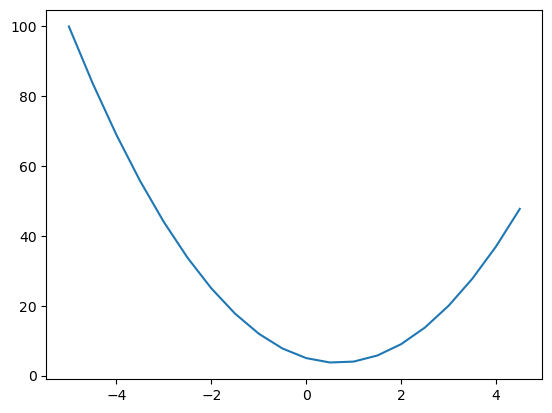

In [12]:
xs = np.arange(-5,5,0.5)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
d = a*b + c

In [21]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})" #just to display a cleaner expression visually

    def __add__(self, other):
        out = Value(self.data+other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data*other.data)
        return out

a=Value(2.0)
b = Value(-3.0)
c = Value(10.0)

Now to modify this to keep track of the expression graph -- goal is to keep a track of what values lead to each value.

Why is this important? So that we can calculate derivatives and remember what the value of each node is. Otherwise if the values keep getting reset, the derivatives won't truly make sense.

In [23]:
class Value:

    def __init__(self, data, _children=()): # we include this to know which values led to a specific node value
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})" #just to display a cleaner expression visually

    def __add__(self, other):
        out = Value(self.data+other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data*other.data, (self, other))
        return out

In [24]:
a=Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d= a*b+c

In [25]:
d

Value(data=4.0)

In [26]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [27]:
c._prev

set()

In [28]:
a._prev

set()

In [5]:
class Value:

    def __init__(self, data, _children=(), _op='',label=''): # we include this to know which values led to a specific node value
        self.data = data
        self.grad = 0.0 #means no effect on the output
        self._prev = set(_children)
        self._op= _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})" #just to display a cleaner expression visually

    def __add__(self, other):
        out = Value(self.data+other.data, (self, other),'+')
        return out

    def __mul__(self, other):
        out = Value(self.data*other.data, (self, other),'*')
        return out

In [16]:
a=Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d= e+c; d.label='d'
f = Value(-2.0, label='f')
L=d*f; L.label='L'
L

Value(data=-8.0)

In [17]:
d._op

'+'

In [18]:
d

Value(data=4.0)

In [23]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

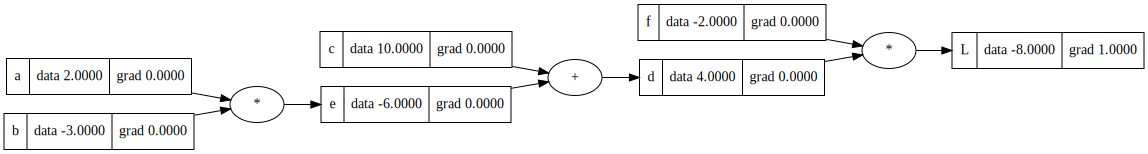

In [32]:
draw_dot(L)

Things done so far:

1. build math expressions, scalar valued,
2. do the forward pass,
3. produces single output, 
4. visualize the forward pass


derivatives of each node with respect to the child nodes; 

so the function we define can be something like the loss function; we try to figure out derivatives of loss function wrt  weights not input

In [31]:
L.grad=1

In [61]:
def LMAO():
    h=0.001
    a=Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d= e+c; d.label='d'
    f = Value(-2.0, label='f')
    L=d*f; L.label='L'
    L1 = L.data

    a=Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data+=h
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d= e+c; d.label='d'
    f = Value(-2.0, label='f')
    L=d*f; L.label='L'
    L2 = L.data 

    print((L2-L1)/h)

In [62]:
LMAO()

-3.9999999999995595


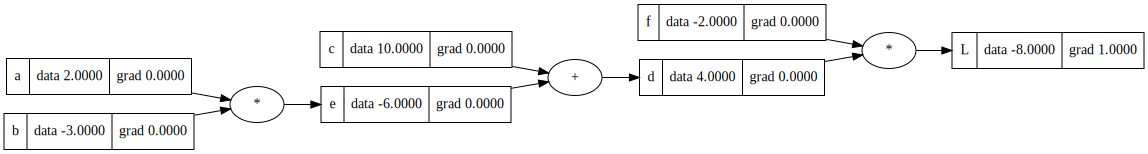

In [33]:
draw_dot(L)

L = d*f
dL/dd = [(d+h)*f - d*f]/h

In [38]:
f.grad = 4.0
d.grad = -2.0

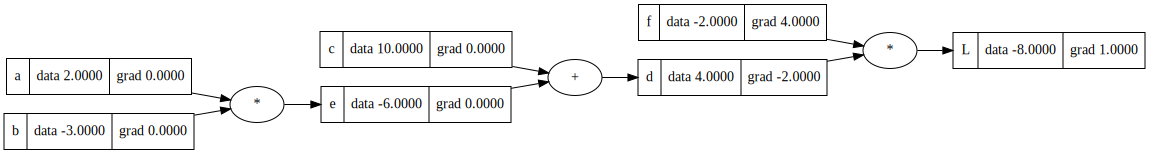

In [39]:
draw_dot(L)

chain rule time

d = c+e

dd/dc = 1

(c+h+e) - (c+e) / h = 1

In [48]:
c.grad = -2.0
e.grad = -2.0

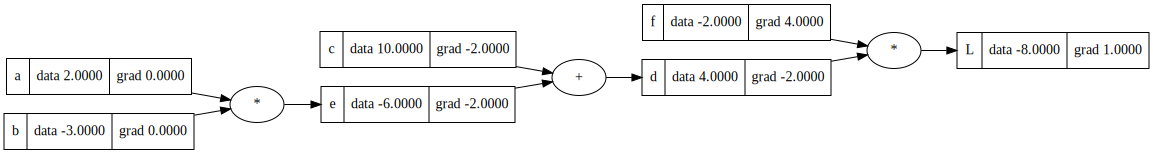

In [49]:
draw_dot(L)

In [ ]:
dL/da, dL/db

In [54]:
a.grad = 6.00
b.grad = -4.0

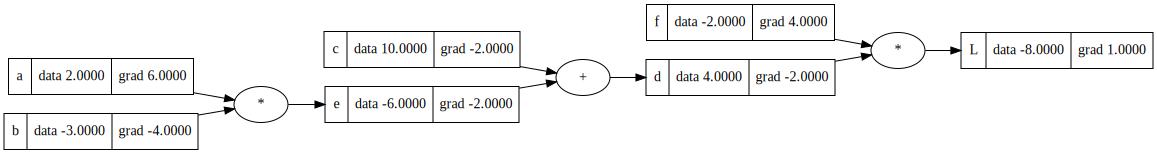

In [55]:
draw_dot(L)

In [63]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad

e = a*b
d= e+c
L=d*f

In [65]:
L.data

-7.286496

Terms relevant: weight, bias, activation function (sigmoid, tanh), output

In [67]:
x = np.arange(-10,10,0.5)
y=np.tanh(x)

In [68]:
x,y

(array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5]),
 array([-1.        , -0.99999999, -0.99999997, -0.99999992, -0.99999977,
        -0.99999939, -0.99999834, -0.99999548, -0.99998771, -0.9999666 ,
        -0.9999092 , -0.99975321, -0.9993293 , -0.9981779 , -0.99505475,
        -0.9866143 , -0.96402758, -0.90514825, -0.76159416, -0.46211716,
         0.        ,  0.46211716,  0.76159416,  0.90514825,  0.96402758,
         0.9866143 ,  0.99505475,  0.9981779 ,  0.9993293 ,  0.99975321,
         0.9999092 ,  0.9999666 ,  0.99998771,  0.99999548,  0.99999834,
         0.99999939,  0.99999977,  0.99999992,  0.99999997,  0.99999999]))

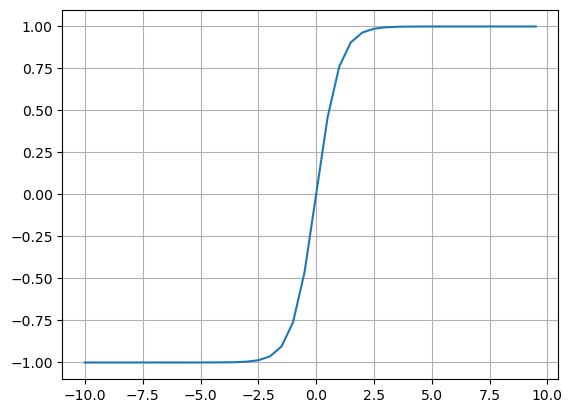

In [70]:
plt.plot(x, y);
plt.grid()

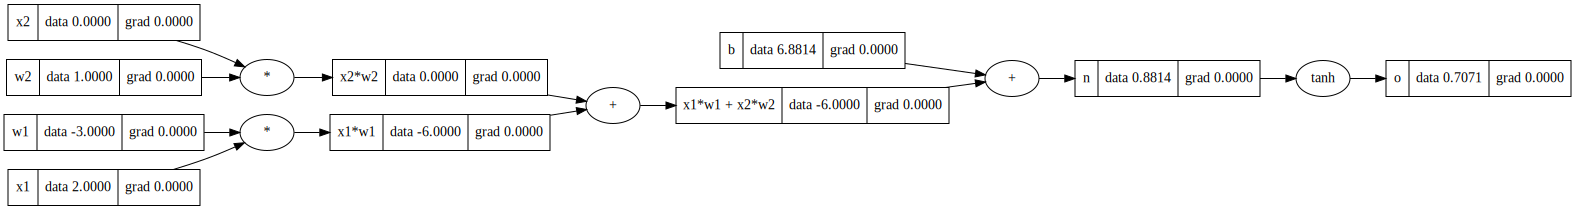

In [109]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

draw_dot(o)

In [115]:
o.grad=1.0

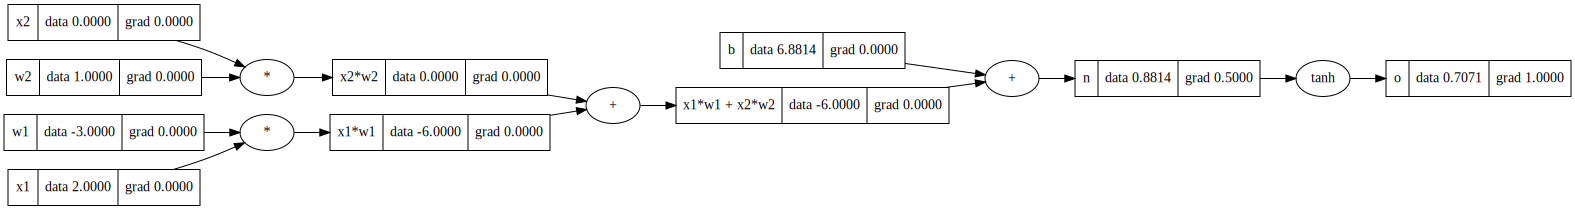

In [116]:
draw_dot(o)

In [117]:
o._backward()

In [119]:
n._backward()

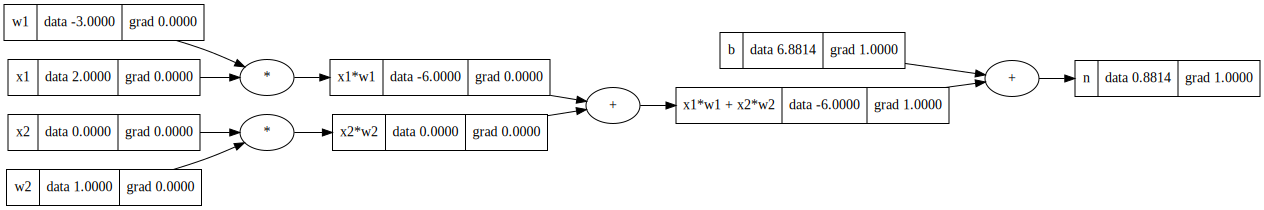

In [121]:
draw_dot(n)

In [127]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other) 
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

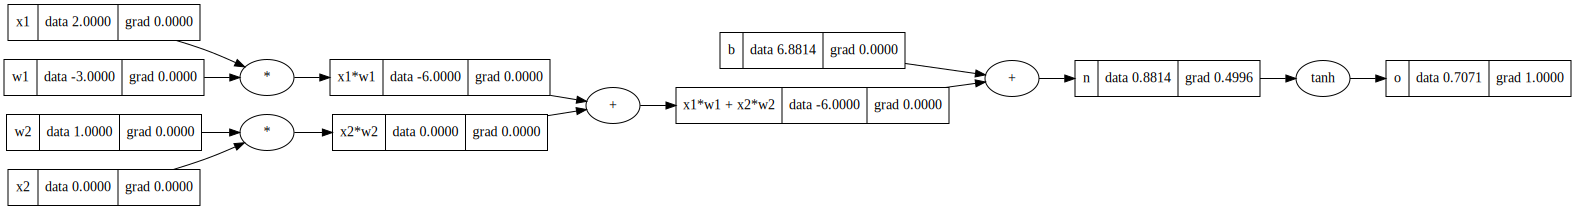

In [94]:
draw_dot(o)

In [89]:
o.grad = 1

o = tanh(n)

#what is do/dn? [f(n+h)-f(n)]/h

h=0.001
n=0.8814

In [92]:
(math.tanh(0.8814+0.001) - math.tanh(0.8814))/0.001

0.49962785998813874

In [93]:
n.grad = 0.499627

In [95]:
#another way to calc derivative => 1-tanh(x) ^2
1 - (math.tanh(0.8814))**2

0.4999813233768232

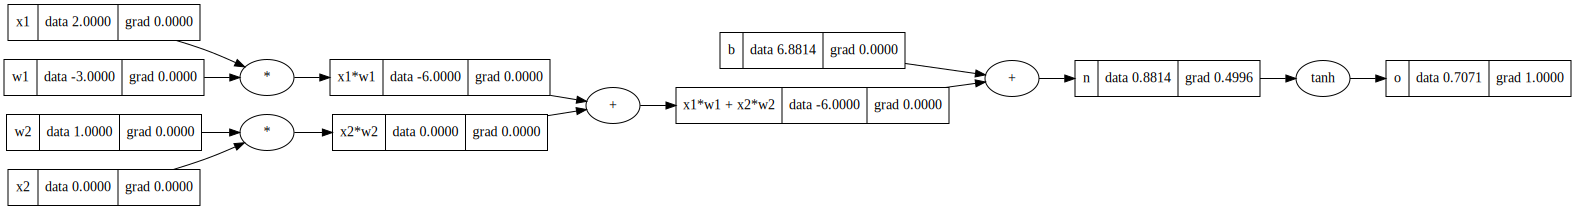

In [96]:
draw_dot(o)

In [ ]:
find dn/db, dn/d(w1x1+w2x2)

In [ ]:
dn/db = w1x1+w2x2
dn/d(w1x1+w2x2) = b

But what we need is do/db, and do/d(w1x1+w2x2)

do/db = do/dn *dn/db
    = 0.5 * -6.0 = -3.0


do/d(w1x1+w2x2) = do/dn *dn/d(w1x1+w2x2)
=0.5*6.8814
=3.4407

In [97]:
b.grad = -3.0
x1w1x2w2.grad = 3.4407

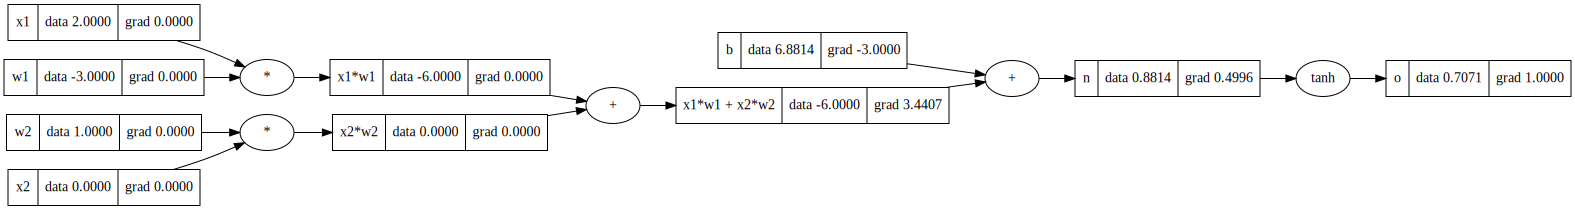

In [98]:
draw_dot(o)

In [ ]:
#Looks like the AK is doing derivative of the intermediate node with respect to the child nodes.
#HJowever in the frist example, it looks like derivative of the final output node was taken. Hence the difference.
#What is going on here? 

x2.grad but with respect to which output

x2.grad wrt w2x2

d(w2x2)/d(x2) = w2 = 1.0
d(w2x2)/d(w2) = x2 = 0.0

In [122]:
#wtf just happened - lost at 1:15

In [128]:
a=Value(2.0)
a+1

Value(data=3.0)

1:32:46 - implementing division

redefine division as mul and exp

In [131]:
import torch

In [132]:

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
#make sure to zero grad to flush the gradients before every pass

#Summary
1. Math expressions that take input and weights as data, do math, calculate output
2. Loss function is a measure of how off the predictions are
3. Backward prop to get the gradients and tune the parameters to odecrease loss
4. do this process many times to minimize the loss
5. Simulated neural tissue, and we can make it do vast number of things and solve hard problems
6. Stochastic Gradient Descent
7. Cross entropy loss - what is this? - apparently a loss function?

Action items - review second half of lecture, demo micrograd, pytorch lets you define 
a autograd - look into how why

##### this is just a trial video

In [1]:
xx

NameError: name 'xx' is not defined